# Severstal: Steel Defect Detection

https://www.kaggle.com/c/severstal-steel-defect-detection

In [1]:
import os
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader, sampler
from torchvision import transforms as T
from torchvision import models

from PIL import Image

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime

from severstal_utils import *
from severstal_models import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TRAIN_PATH = 'train_images'
TEST_PATH = 'test_images'
MODEL_PATH = 'models/'
SUBMS_PATH = 'submissions/'


if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor

In [4]:
img_mean = (0.3438812517320017,)
img_std = (0.13965334396720055,)

transform_train = T.Compose([
#     RandomCrop(FRAME_SIZE),
#     RandomVerticalFlip(0.5),
#     RandomHorizontalFlip(0.5),
    T.ToTensor(),
    T.Normalize(mean=img_mean, std=img_std)
])

transform_val = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=img_mean, std=img_std)
])

In [5]:
# Splitting to training and validation parts
imglist = os.listdir(TRAIN_PATH)
imglist_train, imglist_val = train_test_split(imglist, test_size=0.1, random_state=42)

# Datasets
ds_train = SteelFramesDataset(TRAIN_PATH, imglist_train, masks_csv='train.csv', transform=transform_train)
ds_val = SteelFramesDataset(TRAIN_PATH, imglist_val, masks_csv='train.csv', transform=transform_val)

In [6]:
params_loader = {
    'batch_size': NUM_FRAMES * 2,
    'num_workers': 5,
    'pin_memory': True
}

# Data loaders
loader_train = DataLoader(
    ds_train,
    shuffle=True,
    **params_loader
)
loader_val = DataLoader(
    ds_val,
    shuffle=False,
    **params_loader)

In [7]:
# Model defenition
params_unet = {
    'depth': 5,
    'n_filters': 48,
    'bn': True,
    'activation': 'relu'
}

unet = UnetD(**params_unet)
unet = unet.to(device=device);

detector = Detector(unet, device)

In [8]:
%%time

params_train = {
    'epochs': 25,
    'print_every': 0,
    'lr': 0.0001,
}

loss_fun = torch.nn.CrossEntropyLoss()

detector.fit(loader_train, loader_val, loss_fun, **params_train)

100%|██████████| 5656/5656 [34:58<00:00,  2.70it/s]

After 1 epochs:
Training loss = 0.18058366705024972



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.09645632354286258
Val Dice score:  0.9448039005840213



100%|██████████| 5656/5656 [34:45<00:00,  2.71it/s]

After 2 epochs:
Training loss = 0.08379806078533712



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.0855085439605871
Val Dice score:  0.9479032591305371



100%|██████████| 5656/5656 [34:46<00:00,  2.71it/s]

After 3 epochs:
Training loss = 0.07294240890050377



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.07446127081258028
Val Dice score:  0.9490128291345534



100%|██████████| 5656/5656 [34:45<00:00,  2.71it/s]

After 4 epochs:
Training loss = 0.06623979975086458



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.07535503692778647
Val Dice score:  0.9526636673518373



100%|██████████| 5656/5656 [34:46<00:00,  2.71it/s]

After 5 epochs:
Training loss = 0.0614783146927108



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.06239749221160379
Val Dice score:  0.9563968946939436



100%|██████████| 5656/5656 [34:46<00:00,  2.71it/s]

After 6 epochs:
Training loss = 0.05842422135816509



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.07010701300570588
Val Dice score:  0.9535962942581663



100%|██████████| 5656/5656 [34:45<00:00,  2.71it/s]

After 7 epochs:
Training loss = 0.05555508999241373



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.060786669249443544
Val Dice score:  0.9579405545145154



100%|██████████| 5656/5656 [34:46<00:00,  2.71it/s]

After 8 epochs:
Training loss = 0.05332622860768951



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.06297613942938525
Val Dice score:  0.9573756534140927



100%|██████████| 5656/5656 [34:45<00:00,  2.71it/s]

After 9 epochs:
Training loss = 0.05108691414143574



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05745474404821916
Val Dice score:  0.9568176822901341



100%|██████████| 5656/5656 [34:46<00:00,  2.71it/s]

After 10 epochs:
Training loss = 0.049185777082287954



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05985507741687397
Val Dice score:  0.9558893842837501



100%|██████████| 5656/5656 [34:56<00:00,  2.70it/s]

After 11 epochs:
Training loss = 0.047477703081897506



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.058122016017859324
Val Dice score:  0.9562472253919312



100%|██████████| 5656/5656 [34:02<00:00,  2.77it/s]

After 12 epochs:
Training loss = 0.04570228212162312



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.07499573220581147
Val Dice score:  0.9578258834287299



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 13 epochs:
Training loss = 0.04402685877521018



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.059953594530952795
Val Dice score:  0.9560211739468024



100%|██████████| 5656/5656 [33:17<00:00,  2.83it/s]

After 14 epochs:
Training loss = 0.042532248907472966



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05391394920678772
Val Dice score:  0.9557693573152061



100%|██████████| 5656/5656 [33:17<00:00,  2.83it/s]

After 15 epochs:
Training loss = 0.04110719427584877



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05890399578643007
Val Dice score:  0.9616528033451515



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 16 epochs:
Training loss = 0.039559095661139125



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05231775462639057
Val Dice score:  0.960890874278479



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 17 epochs:
Training loss = 0.03748141818545515



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05842841411263979
Val Dice score:  0.9516529881394659



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 18 epochs:
Training loss = 0.0363454578429016



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05933567914305717
Val Dice score:  0.9619363947055031



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 19 epochs:
Training loss = 0.03482666201516113



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05483295293502055
Val Dice score:  0.956814466294734



100%|██████████| 5656/5656 [33:19<00:00,  2.83it/s]

After 20 epochs:
Training loss = 0.03341525894424357



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05276014412679517
Val Dice score:  0.9601945195676034



100%|██████████| 5656/5656 [33:19<00:00,  2.83it/s]

After 21 epochs:
Training loss = 0.0318224760148297



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.060113117559262956
Val Dice score:  0.9634742557575708



100%|██████████| 5656/5656 [33:19<00:00,  2.83it/s]

After 22 epochs:
Training loss = 0.03078301346784262



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.05939367732983685
Val Dice score:  0.9590926235786201



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 23 epochs:
Training loss = 0.02921268009849731



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.054903926296260716
Val Dice score:  0.9639929909979245



100%|██████████| 5656/5656 [33:18<00:00,  2.83it/s]

After 24 epochs:
Training loss = 0.02828468961738598



  0%|          | 0/5656 [00:00<?, ?it/s]

Validation loss: 0.06061312448134883
Val Dice score:  0.9605026890004355



100%|██████████| 5656/5656 [33:19<00:00,  2.83it/s]

After 25 epochs:
Training loss = 0.027355255153447177


Validation loss: 0.061252763184175364
Val Dice score:  0.9616100161248194

Best model dice: 0.9639929909979245
CPU times: user 11h 14min 25s, sys: 3h 40min 28s, total: 14h 54min 53s
Wall time: 14h 42min 29s


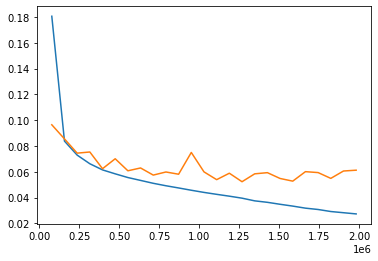

In [9]:
plt.plot(
    detector.n_frames, detector.loss_history,
    detector.n_frames, detector.val_loss_history,
);

In [10]:
# Save weights
# Final state
fname_wts_final = f"unetd_D{params_unet['depth']}F{params_unet['n_filters']}E{params_train['epochs']}_final.pth"
torch.save(detector.model.state_dict(), os.path.join(MODEL_PATH, fname_wts_final))

# # Best weights
# fname_wts_best = f'unetd_D{params_unet['depth']}F{params_unet['n_filters']}E{params_train['epochs']}_best.pth'
# torch.save(detector.best_model_wts, os.path.join(MODEL_PATH, fname_wts_best))

In [ ]:
# Load weights
detector.model.load_state_dict(torch.load(os.path.join(MODEL_PATH, 'unetd_D5F16E1_final.pth')))